In [25]:
from datetime import datetime, timedelta
import urllib.parse
import time
import yfinance as yf
import pandas as pd
from gdeltdoc import GdeltDoc, Filters
import matplotlib.pyplot as plt
import os

To start with we need datasets for both sentiment analysis of news data and stock market data. Im using GDELT to get news and YahooFinance to get stock data and this would be my source of truth

1. GDELT: https://github.com/alex9smith/gdelt-doc-api
2. YahooFinance: https://pypi.org/project/yfinance/

In [ ]:
#Get news data for sentiment analysis

start_date = datetime(2024, 10, 1)
end_date = datetime(2025, 3, 1)

keywords = ["US election", "Dow Jones", "S&P 500", "Nasdaq", "Trump", "stock market", "Elon Musk", "Swing States", "Inflation", "Federal reserve rate"]
wait_time = 300

for key in keywords:

    encoded_query = urllib.parse.quote(key)

    current_date = start_date
    while current_date <= end_date:

        today = current_date.strftime("%Y-%m-%d")
        tomorrow = (current_date + timedelta(days=1)).strftime("%Y-%m-%d") 

        gd = GdeltDoc()

        f = Filters(
        start_date = today,
        end_date = tomorrow,
        num_records = 200,
        keyword = encoded_query,
        country = "US",
        )

        articles = gd.article_search(f)

        df = pd.DataFrame(articles)
        df.to_csv(os.getcwd()+'/newsdataset_1/'+'gdelt_'+key+'.csv', mode='a', header=False, index=False)

        current_date += timedelta(days=1)

    print(f"\n News data from Gdelt successfully fetched and stored for the key: {key}")
    time.sleep(wait_time)



 News data from Gdelt successfully fetched and stored for the key: US election


This is just an example of how I have retrieved data for news sentiment analysis. This is a slow process and took more than 3 hours based on my queries. I wanted 200 records over a list of keywords provided from 31 October 2024 to 28 Feburary 2025. I had a wait time of 5 minutes between each keyword and each API call, adhereing to rate limits.

Fetching data for Dow_Jones (^DJI)
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Data saved to Dow_Jones_Stock_Data.csv


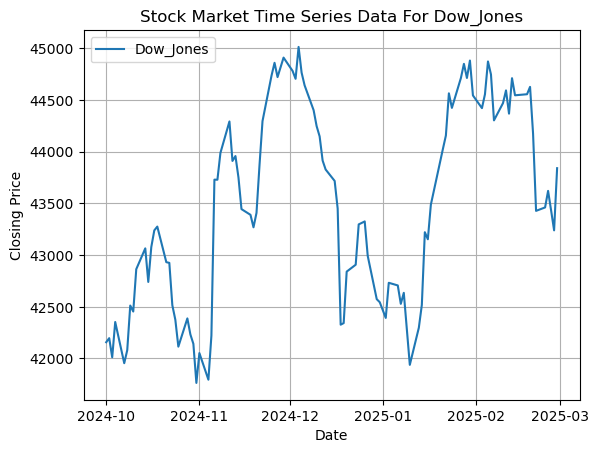

[*********************100%***********************]  1 of 1 completed


Fetching data for S&P_500 (^GSPC)
Data saved to S&P_500_Stock_Data.csv


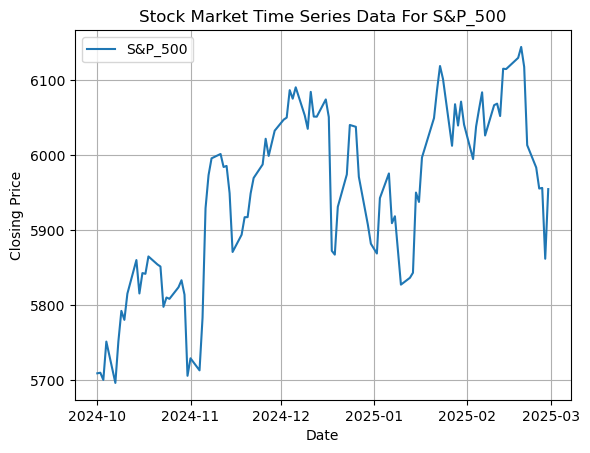

Fetching data for Nasdaq (^IXIC)


[*********************100%***********************]  1 of 1 completed


Data saved to Nasdaq_Stock_Data.csv


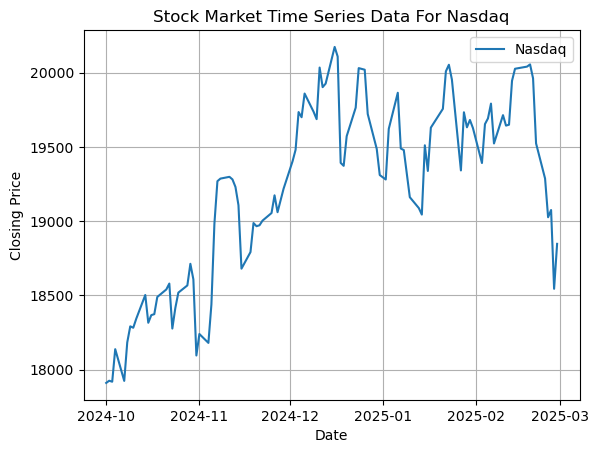

Fetching data for Bitcoin_Index (BTC)


[*********************100%***********************]  1 of 1 completed

Data saved to Bitcoin_Index_Stock_Data.csv


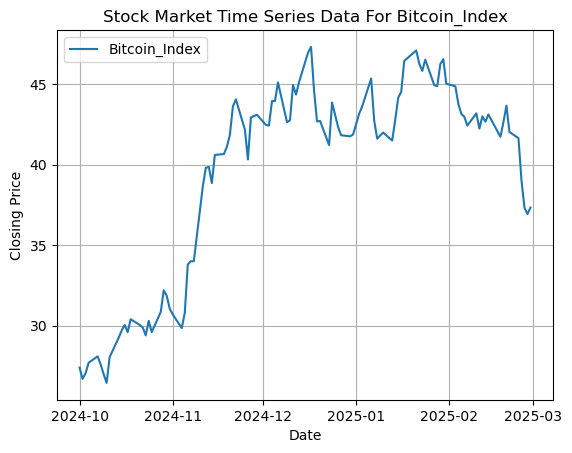

[*********************100%***********************]  1 of 1 completed

Fetching data for Dogecoin (DOGE-USD)
Data saved to Dogecoin_Stock_Data.csv


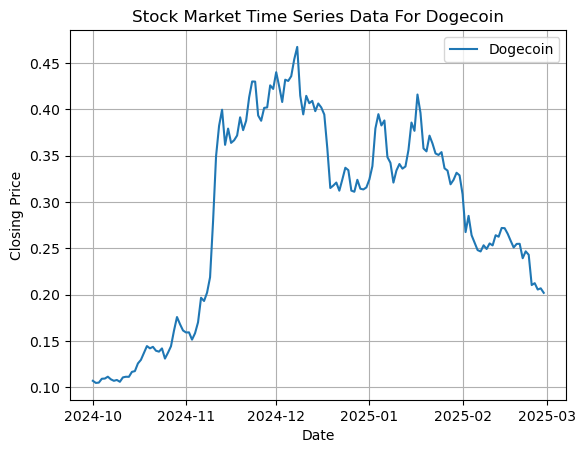


 Stock market data successfully fetched and stored


In [27]:
# Define the indices and their corresponding Yahoo Finance tickers

indices = {
    'Dow_Jones': '^DJI',
    'S&P_500': '^GSPC',
    'Nasdaq': '^IXIC',
    'Bitcoin_Index': 'BTC',
    'Dogecoin': 'DOGE-USD'
}

start_date = '2024-10-01'
end_date = '2025-03-01'

plt1 =''

for name, ticker in indices.items():
    print(f"Fetching data for {name} ({ticker})")
    
    df = yf.download(ticker, start=start_date, end=end_date, interval="1d")
    
    filename = f"{name}_Stock_Data.csv"
    dirPath = os.path.join(os.getcwd()+'/stockdataset_1',filename)
    df.to_csv(dirPath)

    print(f"Data saved to {filename}")
    
    plt.plot(df.index, df['Close'], label=name)

    plt.title("Stock Market Time Series Data For "+name)
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.legend()
    plt.grid(True)
    plt.show()

print("\n Stock market data successfully fetched and stored")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for Dow_Jones (^DJI)
Data saved to Dogecoin_Stock_Data.csv
Fetching data for S&P_500 (^GSPC)
Data saved to Dogecoin_Stock_Data.csv
Fetching data for Nasdaq (^IXIC)
Data saved to Dogecoin_Stock_Data.csv
Fetching data for Bitcoin (BTC)
Data saved to Dogecoin_Stock_Data.csv
Fetching data for Dogecoin (DOGE-USD)
Data saved to Dogecoin_Stock_Data.csv

 Stock market data successfully fetched and stored


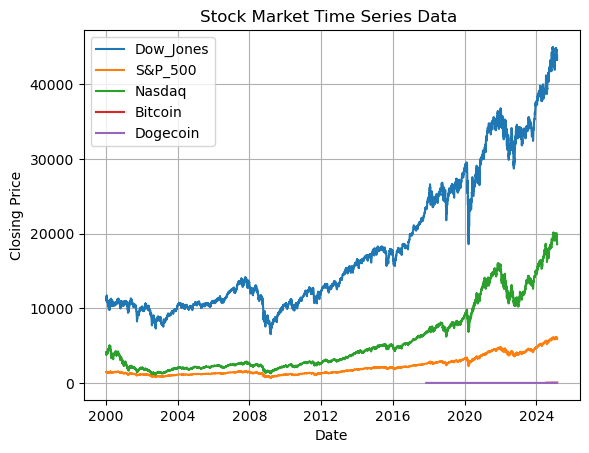

In [31]:
#Lets also plot at historical stock prices from 2000 to Jan 31, 2025, for informational purposes

indices = {
    'Dow_Jones': '^DJI',
    'S&P_500': '^GSPC',
    'Nasdaq': '^IXIC',
    'Bitcoin': 'BTC',
    'Dogecoin': 'DOGE-USD'
}

start_date = '2000-01-01'
end_date = '2025-03-01'

for name, ticker in indices.items():
    print(f"Fetching data for {name} ({ticker})")
    
    df = yf.download(ticker, start=start_date, end=end_date, interval="1d")

    print(f"Data saved to {filename}")
    plt.plot(df.index, df['Close'], label=name)

print("\n Stock market data successfully fetched and stored")

plt.title("Stock Market Time Series Data ")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()
